In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [80]:
# df = df.drop(['bedrooms','bathrms','stories','garagepl'], axis=1)
# df.head()
df.describe(include='all')

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546,546,546,546,546,546.000000,546
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,469,449,355,521,373,NaN,418
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,NaN,NaN,NaN,NaN,NaN,0.692308,NaN
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,NaN,NaN,NaN,NaN,NaN,0.861307,NaN
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [81]:
df.driveway = df.driveway.eq('yes').mul(1)
df.recroom = df.recroom.eq('yes').mul(1)
df.fullbase = df.fullbase.eq('yes').mul(1)
df.gashw = df.gashw.eq('yes').mul(1)
df.airco = df.airco.eq('yes').mul(1)
df.prefarea = df.prefarea.eq('yes').mul(1)

df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [82]:
X = df['price'].values
y = df['driveway'].values
print(X.shape, y.shape)

(546,) (546,)


In [83]:
msk = np.random.rand(len(X)) < 0.7
X_train = X[msk]
X_test = X[~msk]
y_train = y[msk]
y_test = y[~msk]
print(X_train.shape, X_test.shape)

(367,) (179,)


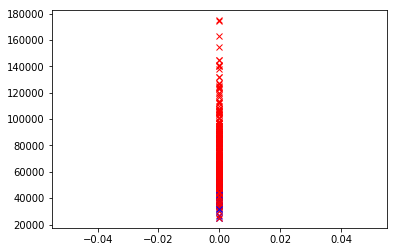

In [84]:
for i in range(X_train.shape[0]):
    if y_train[i]==1:
        plt.plot(X_train[i],'rx')
#         plt.plot(X_train[i,0],X_train[i,1],'rx')
    else:
        plt.plot(X_train[i],'bx')
#         plt.plot(X_train[i,0],X_train[i,1],'bx')
plt.show()

In [66]:
#Normalizing
X_train = (X_train-np.min(X_train,axis=0))/(np.max(X_train,axis=0)-np.min(X_train,axis=0))
X_test = (X_test-np.min(X_test,axis=0))/(np.max(X_test,axis=0)-np.min(X_test,axis=0))

In [68]:
#Adding row for bias
X_train = np.concatenate( (np.ones((X_train.shape[0],1)),X_train) , axis=1)
X_test = np.concatenate( (np.ones((X_test.shape[0],1)),X_test) , axis=1)
print(X_train.shape)

(383, 3)


In [69]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def sig_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [70]:
m,n = X_train.shape # n is the shape of original_X.shape[0]+1
theta = np.random.rand(1,n)
print(theta)
h = sigmoid(X_train@theta.T)
h = h.reshape(-1)
print(h.shape)

[[0.65894138 0.07612753 0.83374582]]
(383,)


In [71]:
def get_cost(h,y):
    return -(1/m)*(y.T@np.log(1-h) + (1-y).T@np.log(1-h))
# get_cost(h,y)

In [72]:
def gd(X,y,theta,alpha,lam,it):
    i=0
    while(i<it):
        h = sigmoid(X@theta.T).reshape(-1)
        theta = theta - alpha/m*(X.T@(h-y)) - lam/m*np.sum(theta[:,1:])
#         theta = theta*(1-(alpha*lam/m)) - alpha/m*(X.T@(h-y)) 
        i+=1
    return theta

## Without regularization

In [74]:
alphas = [0.0001, 0.001, 0.01, 0.1] #, 1, 10, 100

for alpha in alphas:
    thetax = gd(X_train,y_train,theta,alpha,0,10000) #Regularization=0

    #Testing
    h = sigmoid(X_test@thetax.T)
    h = (h>=0.5)*1
    h = h.reshape(-1)
#     err = np.sum(np.abs(h-y))/y.shape[0]
    acc = np.sum(h==y_test)/y_test.shape[0]
    print("Alpha = " + str(alpha) + ", Accuracy % = " + str(acc*100))


Alpha = 0.0001, Accuracy % = 35.58282208588957
Alpha = 0.001, Accuracy % = 64.41717791411043
Alpha = 0.01, Accuracy % = 65.03067484662577
Alpha = 0.1, Accuracy % = 68.71165644171779


## With regularization

In [75]:
alphas = [0.0001, 0.001, 0.01, 0.1] #, 1, 10, 100
lams = [0,0.001,0.01,0.1,1,10]

for lam in lams:
    print("Lambda = " + str(lam))
    for alpha in alphas:
        thetax = gd(X_train,y_train,theta,alpha,lam,10000)
        
        #Testing
        h = sigmoid(X_test@thetax.T)
        h = (h>=0.5)*1
        h = h.reshape(-1)
    #     err = np.sum(np.abs(h-y))/y.shape[0]
        acc = np.sum(h==y_test)/y_test.shape[0]
        print("Alpha = " + str(alpha) + ", Accuracy % = " + str(acc))
    print("--------------------------")

Lambda = 0
Alpha = 0.0001, Accuracy % = 0.3558282208588957
Alpha = 0.001, Accuracy % = 0.6441717791411042
Alpha = 0.01, Accuracy % = 0.6503067484662577
Alpha = 0.1, Accuracy % = 0.6871165644171779
--------------------------
Lambda = 0.001
Alpha = 0.0001, Accuracy % = 0.3558282208588957
Alpha = 0.001, Accuracy % = 0.6441717791411042
Alpha = 0.01, Accuracy % = 0.6503067484662577
Alpha = 0.1, Accuracy % = 0.6871165644171779
--------------------------
Lambda = 0.01
Alpha = 0.0001, Accuracy % = 0.3558282208588957
Alpha = 0.001, Accuracy % = 0.6441717791411042
Alpha = 0.01, Accuracy % = 0.6503067484662577
Alpha = 0.1, Accuracy % = 0.6871165644171779
--------------------------
Lambda = 0.1
Alpha = 0.0001, Accuracy % = 0.43558282208588955
Alpha = 0.001, Accuracy % = 0.6441717791411042
Alpha = 0.01, Accuracy % = 0.6441717791411042
Alpha = 0.1, Accuracy % = 0.6809815950920245
--------------------------
Lambda = 1
Alpha = 0.0001, Accuracy % = 0.3987730061349693
Alpha = 0.001, Accuracy % = 0.64417

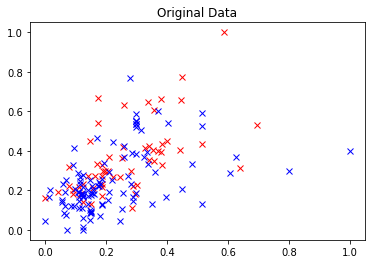

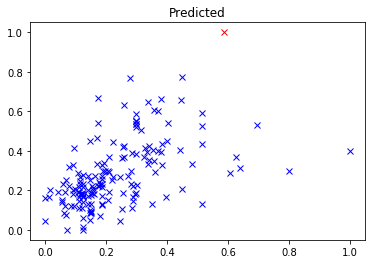

In [76]:
thetax = gd(X_train,y_train,theta,0.01,0.01,10000)

h = sigmoid(X_test@thetax.T)
h = (h>=0.5)*1
h = h.reshape(-1)

def plot_graph(X,y,h):
    mask = y==1
    plt.plot(X[mask,1],X[mask,2],'rx')
    plt.plot(X[~mask,1],X[~mask,2],'bx')
    plt.title("Original Data")
    plt.show()

    mask = h==1
    plt.plot(X[mask,1],X[mask,2],'rx')
    plt.plot(X[~mask,1],X[~mask,2],'bx')
    plt.title('Predicted')
    plt.show()
    
plot_graph(X_test,y_test,h)

## Conclusion
An approximate accuracy of 90% is obtained with alpha 0.01 and lambda 0.01.